# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2023-01-20 14:04:03.968733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 14:04:04.355955: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 14:04:04.356006: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-20 14:04:05.493536: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

<AxesSubplot:ylabel='Count'>

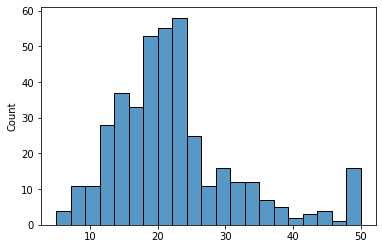

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [3]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [4]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar 
variable names

In [5]:
train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)
test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)



❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [6]:
X_train = pd.DataFrame(X_train)
X_train.describe()
mean_y = y_train.mean()
print("Moyenne de y sur les données d'entraînement :", mean_y)
dummy_y_true = np.array(len(y_test) * [mean_y])
benchmark_mae = mean_absolute_error(dummy_y_true, y_test)
print("MAE benchmark à dépasser dans les modèles à venir : ", benchmark_mae)


Moyenne de y sur les données d'entraînement : 22.395049504950492
MAE benchmark à dépasser dans les modèles à venir :  6.533042127742185


# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [30]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam, Adagrad, Adadelta, Adamax, Ftrl, Nadam, RMSprop, SGD


def initialize_model():
  
    model = Sequential()
    model.add(Dense(10, input_dim=13, activation="relu"))
    model.add(Dense(7, activation="relu"))
    model.add(Dense(1, activation="linear"))

    return model


# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [8]:
def compile_model(model, optimizer_name, learning_rate=0.01):

    match optimizer_name:
        case "adam": opt = Adam(learning_rate=learning_rate)
        case "adagrad": opt = Adagrad(learning_rate=learning_rate)
        case "adadelta": opt = Adadelta(learning_rate=learning_rate)
        case "adamax": opt = Adamax(learning_rate=learning_rate)
        case "ftrl": opt = Ftrl(learning_rate=learning_rate)
        case "nadam": opt = Nadam(learning_rate=learning_rate)
        case "rmsprop": opt = RMSprop(learning_rate=learning_rate)
        case "sgd": opt = SGD(learning_rate=learning_rate)
            
        case _: opt = Adam(learning_rate=learning_rate)
            
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
    return model

❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [9]:
def plot_training_history(history):
    
    sns.lineplot(x=hist.__dict__["epoch"], y=hist.history["mean_absolute_error"], label="Training")
    sns.lineplot(x=hist.__dict__["epoch"], y=hist.history["val_mean_absolute_error"], label="Validation").set(xlabel='epochs', 
                                                                                                    ylabel='mean absolute error')

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='mean_absolute_error', patience=5)

model = initialize_model()
model = compile_model(model, "adam")
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=4, verbose=1, callbacks=[callback])


Epoch 1/50


2023-01-20 14:04:07.882319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-20 14:04:07.882763: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-20 14:04:07.882883: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-20 14:04:07.882986: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-20 14:04:07.883083: W tensorflow/c

68/68 [==============================] - 1s 4ms/step - loss: 21.5883 - mean_absolute_error: 21.5883 - val_loss: 22.5549 - val_mean_absolute_error: 22.5549
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 13.0614 - mean_absolute_error: 13.0614 - val_loss: 6.5132 - val_mean_absolute_error: 6.5132
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 3.8195 - mean_absolute_error: 3.8195 - val_loss: 4.1858 - val_mean_absolute_error: 4.1858
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 3.2812 - mean_absolute_error: 3.2812 - val_loss: 3.9188 - val_mean_absolute_error: 3.9188
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 2.9477 - mean_absolute_error: 2.9477 - val_loss: 3.4461 - val_mean_absolute_error: 3.4461
Epoch 6/50
68/68 [==============================] - 0s 2ms/step - loss: 2.5613 - mean_absolute_error: 2.5613 - val_loss: 3.3744 - val_mean_absolute_error: 3.3744
Epoch 7/50
68/68 [===============

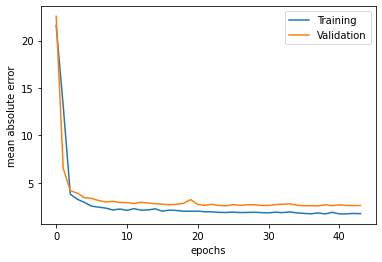

In [11]:
plot_training_history(hist)

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [12]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mean_absolute_error'])
    ax2.plot(history.history['val_mean_absolute_error'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mean_squared_error'])
    ax2.plot(history.history['val_mean_squared_error'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 2ms/step - loss: 3.0468 - mean_absolute_error: 3.0468
MAE with the rmsprop optimizer: 3.0468  reached in 3 s after 40 epochs


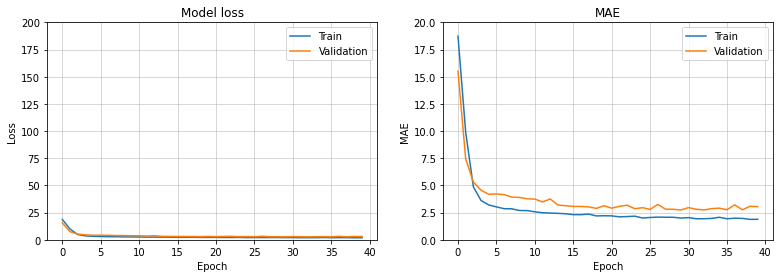

4/4 [==============================] - 0s 2ms/step - loss: 2.8517 - mean_absolute_error: 2.8517
MAE with the adam optimizer: 2.8517  reached in 3 s after 58 epochs


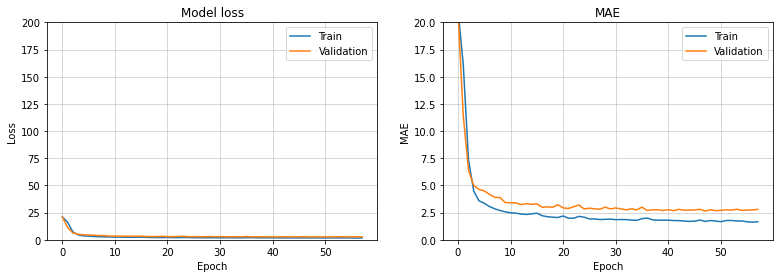

4/4 [==============================] - 0s 3ms/step - loss: 3.1002 - mean_absolute_error: 3.1002
MAE with the adagrad optimizer: 3.1002  reached in 24 s after 500 epochs


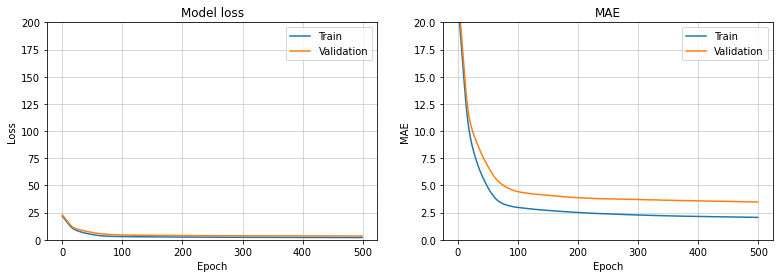

4/4 [==============================] - 0s 2ms/step - loss: 13.1592 - mean_absolute_error: 13.1592
MAE with the adadelta optimizer: 13.1592  reached in 23 s after 500 epochs


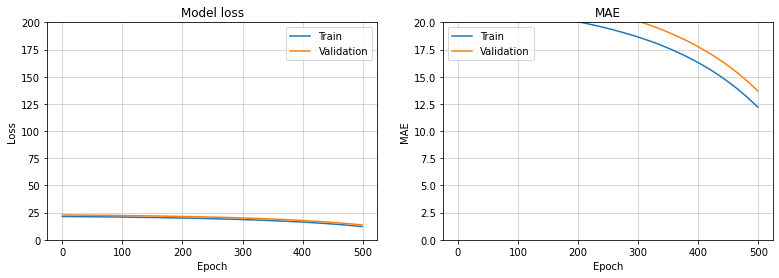

4/4 [==============================] - 0s 2ms/step - loss: 3.0376 - mean_absolute_error: 3.0376
MAE with the adamax optimizer: 3.0376  reached in 4 s after 75 epochs


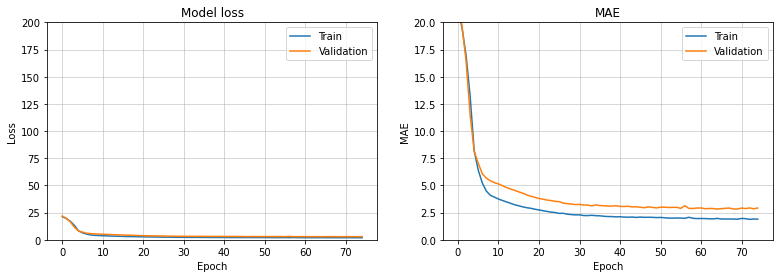

4/4 [==============================] - 0s 2ms/step - loss: 3.7222 - mean_absolute_error: 3.7222
MAE with the ftrl optimizer: 3.7222  reached in 21 s after 500 epochs


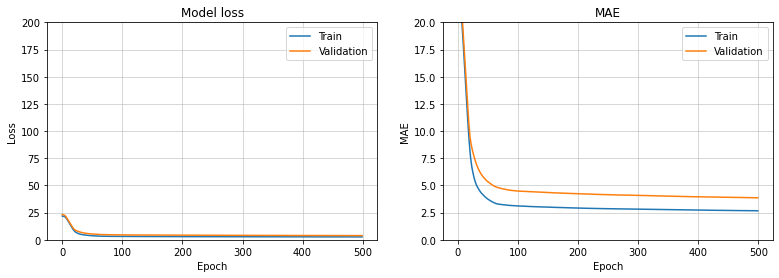

4/4 [==============================] - 0s 2ms/step - loss: 2.8391 - mean_absolute_error: 2.8391
MAE with the nadam optimizer: 2.8391  reached in 2 s after 36 epochs


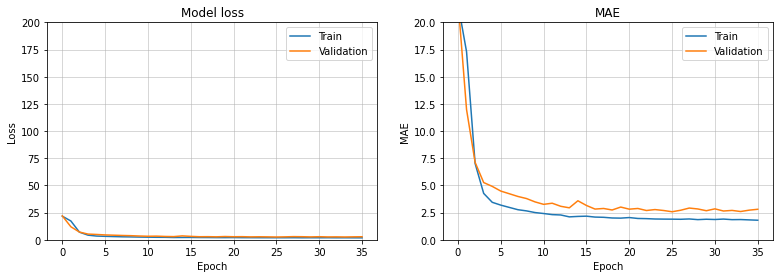

4/4 [==============================] - 0s 2ms/step - loss: 2.8299 - mean_absolute_error: 2.8299
MAE with the sgd optimizer: 2.8299  reached in 3 s after 50 epochs


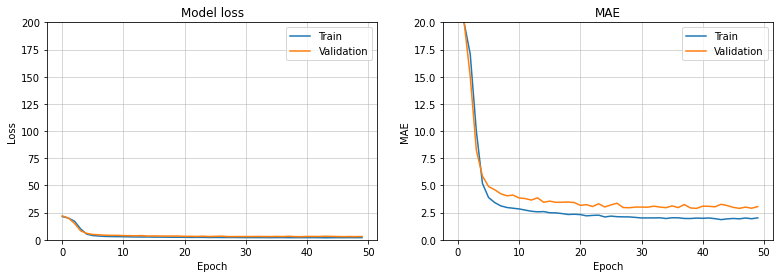

In [13]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad', 'adadelta', 'adamax', 'ftrl', 'nadam', 'sgd']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

**We notice that our predictions are better than the benchmark model previously evaluated. (The MAE is around 3 with these models, versus 6 for the benchmark prediction). The only case where we get worse predictions is if we use the adadelta optimizer (in that case, our MAE is about 14).**

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

Epoch 1/50
68/68 [==============================] - 0s 3ms/step - loss: 5.9929 - mean_absolute_error: 5.9929 - val_loss: 3.9041 - val_mean_absolute_error: 3.9041
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 4.7330 - mean_absolute_error: 4.7330 - val_loss: 4.1497 - val_mean_absolute_error: 4.1497
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 3.8276 - mean_absolute_error: 3.8276 - val_loss: 3.8212 - val_mean_absolute_error: 3.8212
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 3.4591 - mean_absolute_error: 3.4591 - val_loss: 4.3383 - val_mean_absolute_error: 4.3383
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 5.0327 - mean_absolute_error: 5.0327 - val_loss: 4.0316 - val_mean_absolute_error: 4.0316
Epoch 6/50
68/68 [==============================] - 0s 2ms/step - loss: 3.0086 - mean_absolute_error: 3.0086 - val_loss: 4.0879 - val_mean_absolute_error: 4.0879
Epoch 7/50
68/68 [==========

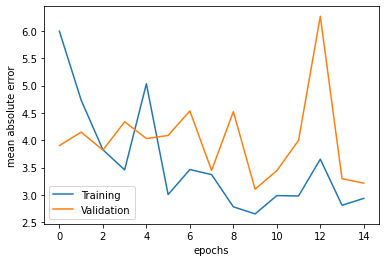

In [14]:
model = initialize_model()
model = compile_model(model, "adam", learning_rate=0.1)
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=50, batch_size=4, verbose=1, callbacks=[callback])
plot_training_history(hist)

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

Training model with learning rate lr=0.0001


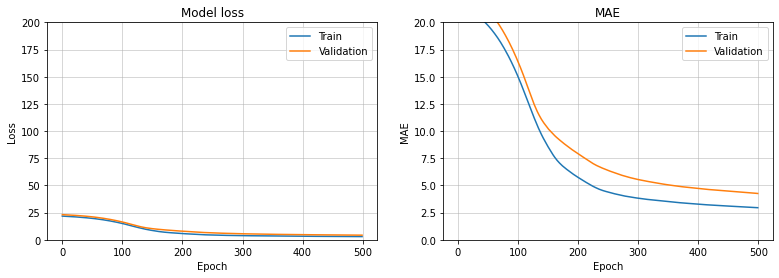

Training model with learning rate lr=0.001


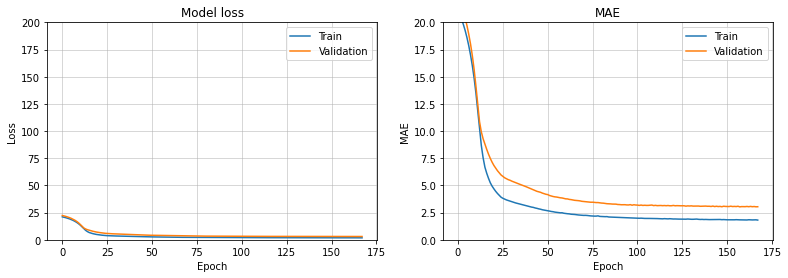

Training model with learning rate lr=0.01


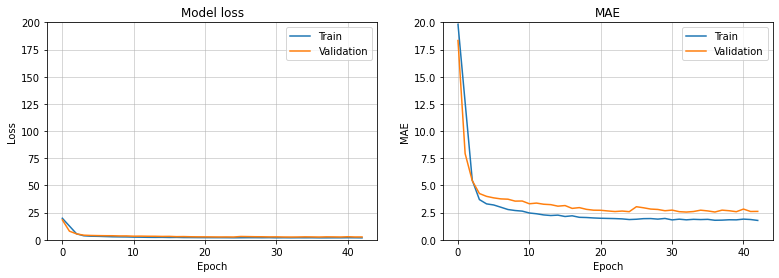

Training model with learning rate lr=0.1


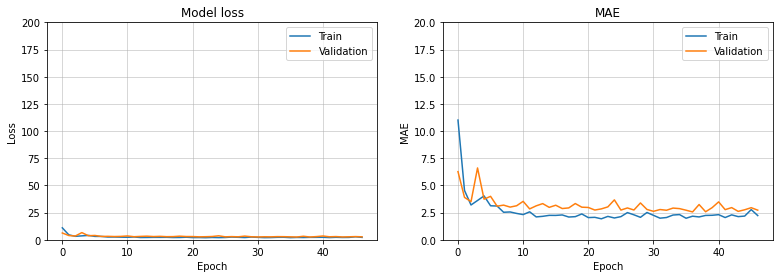

Training model with learning rate lr=1


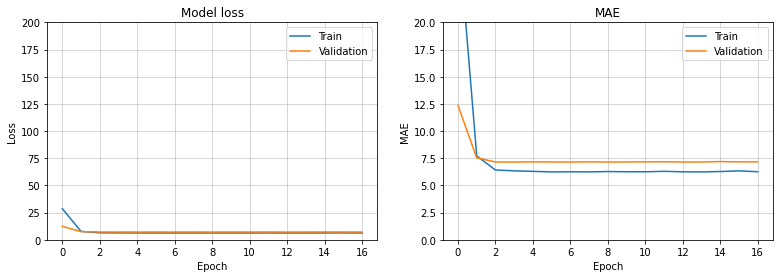

Training model with learning rate lr=5


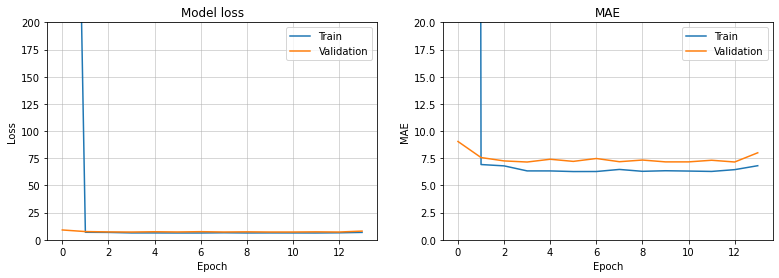

In [15]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    
    print(f"Training model with learning rate lr={lr}")
    model = initialize_model()
    model = compile_model(model, "adam", learning_rate=lr)
    callback = EarlyStopping(patience=10, restore_best_weights=True)
    

    hist = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[callback], verbose=0)

    plot_loss_mae(hist)
 
   

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

With MSE loss function:
4/4 [==============================] - 0s 2ms/step - loss: 20.3133 - mean_absolute_error: 2.9300
MAE with MSE loss function: 2.9300


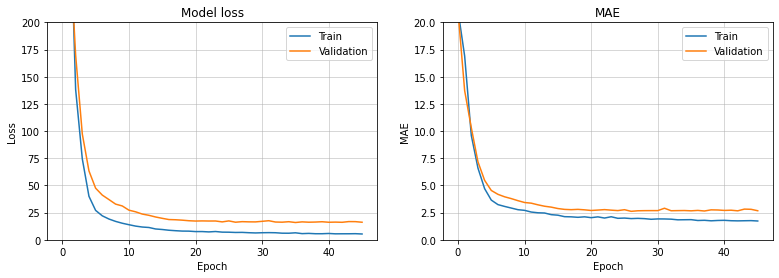

With MAE loss function:
4/4 [==============================] - 0s 2ms/step - loss: 2.9399 - mean_absolute_error: 2.9399
MAE with MSE loss function: 2.9399


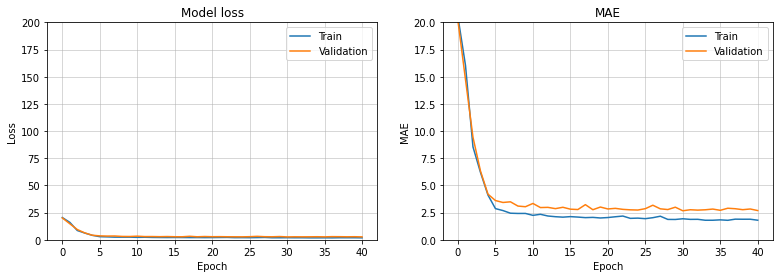

In [19]:
print("With MSE loss function:")
model = initialize_model()
opt = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_absolute_error'])
callback = EarlyStopping(patience=10, restore_best_weights=True)
    

hist = model.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[callback], verbose=0)
res = model.evaluate(X_test, y_test)[1]
print(f'MAE with MSE loss function: {res:.4f}')
plot_loss_mae(hist)

print("With MAE loss function:")
model = initialize_model()
opt = Adam(learning_rate=0.01)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
callback = EarlyStopping(patience=10, restore_best_weights=True)
    

hist = model.fit(X_train, y_train, 
                batch_size=16, 
                epochs=500, 
                validation_split=0.3,
                callbacks=[callback], verbose=0)
res = model.evaluate(X_test, y_test)[1]
print(f'MAE with MSE loss function: {res:.4f}')
plot_loss_mae(hist)

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [26]:
# On teste notre modèle avec différents optimizers et learning rates, puis on garde la meilleure mae
results = []
for optimizer in ['rmsprop', 'adam', 'adagrad', 'adadelta', 'adamax', 'ftrl', 'nadam', 'sgd']:
    print(f"Trying optimizer: {optimizer}")
    for lr in [0.001, 0.01, 0.1, 1, 2, 5]:
        print(f"With learning rate: {lr}")

        model = initialize_model()
        model = compile_model(model, optimizer, learning_rate=lr)
        es = EarlyStopping(patience=10, restore_best_weights=True)

        history = model.fit(X_train, y_train, 
                          batch_size=16, 
                          epochs=500, 
                          validation_split=0.3,
                          callbacks=[es], verbose=0)

        res = model.evaluate(X_test, y_test)[1]
        results.append((optimizer, lr, res))

print("Training results: ")
for r in results: print(r)
performance_df = pd.DataFrame(results)
best_result = performance_df[performance_df[2] == performance_df[2].min()]
best_model = best_result[0].iloc[0]
best_lr = best_result[1].iloc[0]
mae_test = best_result[2].iloc[0]
print(f"Best model: {best_model}")
print(f"Best learning rate: {best_lr}")
print(f"Best MAE: {mae_test}")




Trying optimizer: rmsprop
With learning rate: 0.001
4/4 [==============================] - 0s 2ms/step - loss: 2.8080 - mean_absolute_error: 2.8080
With learning rate: 0.01
4/4 [==============================] - 0s 2ms/step - loss: 2.7033 - mean_absolute_error: 2.7033
With learning rate: 0.1
4/4 [==============================] - 0s 2ms/step - loss: 3.2730 - mean_absolute_error: 3.2730
With learning rate: 1
4/4 [==============================] - 0s 2ms/step - loss: 5.8145 - mean_absolute_error: 5.8145
With learning rate: 2
4/4 [==============================] - 0s 2ms/step - loss: 5.2415 - mean_absolute_error: 5.2415
With learning rate: 5
4/4 [==============================] - 0s 2ms/step - loss: 6.6356 - mean_absolute_error: 6.6356
Trying optimizer: adam
With learning rate: 0.001
4/4 [==============================] - 0s 2ms/step - loss: 3.0845 - mean_absolute_error: 3.0845
With learning rate: 0.01
4/4 [==============================] - 0s 2ms/step - loss: 2.8780 - mean_absolute_error

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

In [36]:

keep_up = True
while keep_up:
    model = initialize_model()
    model = compile_model(model, best_model, learning_rate=best_lr)
    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                          batch_size=16, 
                          epochs=500, 
                          validation_split=0.3,
                          callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    if res <= mae_test: 
        model.save("best_model")
        print(f"Best_model with MAE {res}")
        keep_up = False

4/4 [==============================] - 0s 2ms/step - loss: 2.5473 - mean_absolute_error: 2.5473
INFO:tensorflow:Assets written to: best_model/assets
Best_model with MAE 2.5472543239593506


❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [37]:
model = load_model("best_model")
res = model.evaluate(X_test, y_test)[1]
print(f"MAE: {res}")

4/4 [==============================] - 0s 2ms/step - loss: 2.5473 - mean_absolute_error: 2.5473
MAE: 2.5472543239593506


## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [ ]:
# YOUR CODE HERE